In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [140]:
path = os.getcwd() + "/baseballdatabank-2017.1/core/"

master = pd.read_csv(path+"Master.csv")
batting = pd.read_csv(path+"Batting.csv")
battingPost = pd.read_csv(path+"BattingPost.csv")
fielding = pd.read_csv(path+"Fielding.csv")
parks = pd.read_csv(path+"Parks.csv")
schools = pd.read_csv(path+"Schools.csv")
salaries = pd.read_csv(path+"Salaries.csv")
collegePlaying = pd.read_csv(path+"CollegePlaying.csv")
master.head()
parks.head()
salaries.head()
collegePlaying.head()
batting.head()
fielding.head()
battingPost.head()
schools.head()

,schoolID,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
2,adrianmi,Adrian College,Adrian,MI,USA
3,akron,University of Akron,Akron,OH,USA
4,alabama,University of Alabama,Tuscaloosa,AL,USA


In [ ]:
df1 = pd.concat([master, salaries], axis=1)
df2 = df1.query("salary == salary & playerID == playerID & bats == bats")

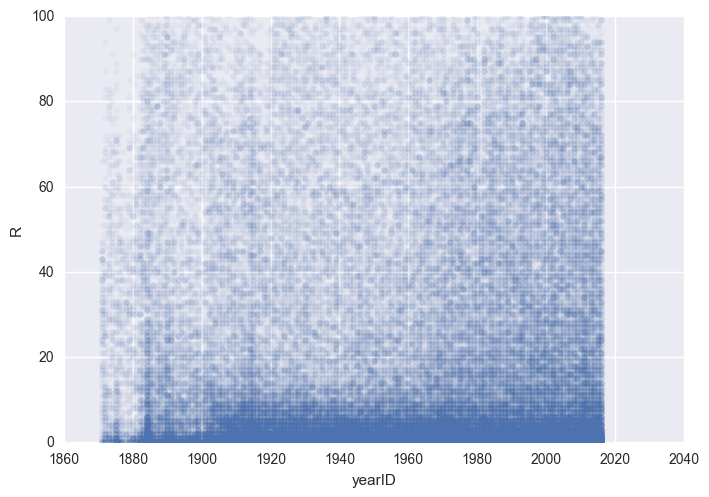

In [126]:
sns.regplot("yearID", "R", data=batting, fit_reg=False, scatter_kws={'alpha': 0.05})
plt.ylim([0,100])
plt.show()

In [162]:
bat_schools = pd.concat([collegePlaying, schools, batting], axis=1)
batSchools = bat_schools.query("playerID == playerID & state == state")
batSchools.head()

,playerID,schoolID,yearID,schoolID,name_full,city,state,country,playerID,yearID,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,pennst,2001.0,abilchrist,Abilene Christian University,Abilene,TX,USA,abercda01,1871,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,aardsda01,rice,2002.0,adelphi,Adelphi University,Garden City,NY,USA,addybo01,1871,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,aardsda01,rice,2003.0,adrianmi,Adrian College,Adrian,MI,USA,allisar01,1871,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,abadan01,gamiddl,1992.0,akron,University of Akron,Akron,OH,USA,allisdo01,1871,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,abadan01,gamiddl,1993.0,alabama,University of Alabama,Tuscaloosa,AL,USA,ansonca01,1871,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [167]:
bat_schools.groupby(['state'])['RBI'].agg([np.mean, np.median]).round(2).sort('median', ascending=False).head(4)

/Users/davidvuong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,mean,median
state,,
HI,29.33,37.0
WA,25.88,29.0
DC,19.86,27.0
WY,22.00,22.0


In [160]:
bat_schools.groupby(['state'])['HR'].agg([np.mean, np.median]).round(2).sort('mean', ascending=False).head(4)

/Users/davidvuong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,mean,median
state,,
UT,1.30,0
WA,0.72,0
DC,0.71,0
CO,0.64,0


In [67]:
df2.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,playerID,salary
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,2004-04-06,2015-08-23,aardd001,aardsda01,1985,ATL,NL,barkele01,870000
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,R,1954-04-13,1976-10-03,aaroh101,aaronha01,1985,ATL,NL,bedrost01,550000
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,R,1962-04-10,1971-09-26,aarot101,aaronto01,1985,ATL,NL,benedbr01,545000
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,R,1977-07-26,1990-10-03,aased001,aasedo01,1985,ATL,NL,campri01,633333
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,L,2001-09-10,2006-04-13,abada001,abadan01,1985,ATL,NL,ceronri01,625000


In [58]:
df2.groupby(['birthCountry'])['salary'].agg([np.mean, np.median]).head(4)

,mean,median
birthCountry,,
Afghanistan,300000,300000
American Samoa,300000,300000
Aruba,963834,775000
At Sea,230000,230000


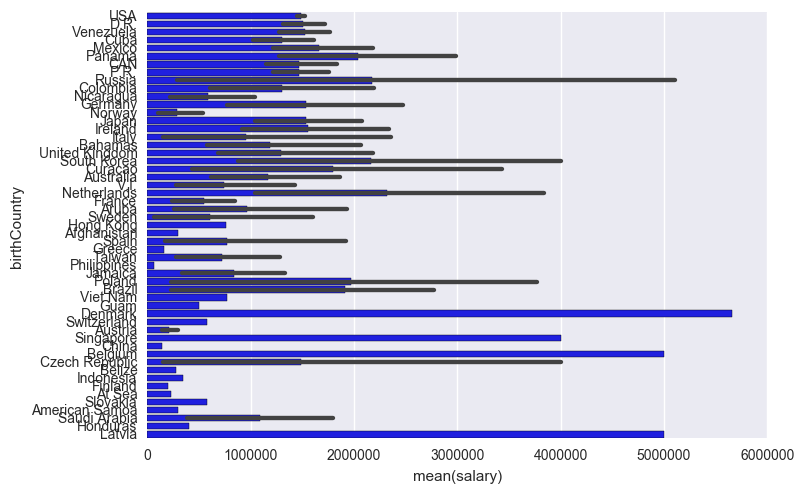

In [82]:
sns.barplot(x=df2["salary"], y=df2["birthCountry"], color='blue')
plt.show()